In [23]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [24]:
# parameters setup

imgs_path = "https://drive.google.com/drive/folders/105v1JRIYCSj7sjYqda2We39kXLklEqfG?usp=sharing"
imgs_model_width, imgs_model_height = 512, 512

# number of most similar images to retrieve
nb_closest_images = 10

In [25]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [26]:
# get the images paths
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]

print("number of images:",len(files))

number of images: 2037


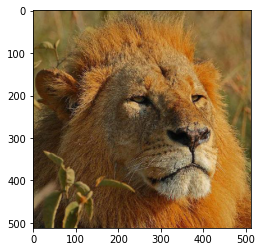

image loaded successfully!


In [27]:
# feed one image into the CNN
# load an image in PIL format
original = load_img(files[1], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [28]:
# convert the PIL image to a numpy array
numpy_image = img_to_array(original)

# convert the images into batch format

# we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

# image batch size(batchsize, height, width, channels)

image batch size (1, 512, 512, 3)


In [33]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(512, 512))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [35]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(2037, 4096)

In [36]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,/content/drive/My Drive/filteredImages/2387.jpg,/content/drive/My Drive/filteredImages/2450.jpg,/content/drive/My Drive/filteredImages/2327.jpg,/content/drive/My Drive/filteredImages/2476.jpg,/content/drive/My Drive/filteredImages/241.jpg,/content/drive/My Drive/filteredImages/2484.jpg,/content/drive/My Drive/filteredImages/2438.jpg,/content/drive/My Drive/filteredImages/2347.jpg,/content/drive/My Drive/filteredImages/2339.jpg,/content/drive/My Drive/filteredImages/2481.jpg,/content/drive/My Drive/filteredImages/2477.jpg,/content/drive/My Drive/filteredImages/2228.jpg,/content/drive/My Drive/filteredImages/2286.jpg,/content/drive/My Drive/filteredImages/2233.jpg,/content/drive/My Drive/filteredImages/2271.jpg,/content/drive/My Drive/filteredImages/2409.jpg,/content/drive/My Drive/filteredImages/2398.jpg,/content/drive/My Drive/filteredImages/2204.jpg,/content/drive/My Drive/filteredImages/24.jpg,/content/drive/My Drive/filteredImages/2331.jpg,/content/drive/My Drive/filteredImages/2352.jpg,/content/drive/My Drive/filteredImages/2275.jpg,/content/drive/My Drive/filteredImages/2463.jpg,/content/drive/My Drive/filteredImages/2273.jpg,/content/drive/My Drive/filteredImages/234.jpg,/content/drive/My Drive/filteredImages/2337.jpg,/content/drive/My Drive/filteredImages/2234.jpg,/content/drive/My Drive/filteredImages/2513.jpg,/content/drive/My Drive/filteredImages/2487.jpg,/content/drive/My Drive/filteredImages/2333.jpg,/content/drive/My Drive/filteredImages/2446.jpg,/content/drive/My Drive/filteredImages/2232.jpg,/content/drive/My Drive/filteredImages/2466.jpg,/content/drive/My Drive/filteredImages/2250.jpg,/content/drive/My Drive/filteredImages/2464.jpg,/content/drive/My Drive/filteredImages/2274.jpg,/content/drive/My Drive/filteredImages/2279.jpg,/content/drive/My Drive/filteredImages/2284.jpg,/content/drive/My Drive/filteredImages/2486.jpg,/content/drive/My Drive/filteredImages/2265.jpg,...,/content/drive/My Drive/filteredImages/1332.jpg,/content/drive/My Drive/filteredImages/118.jpg,/content/drive/My Drive/filteredImages/1470.jpg,/content/drive/My Drive/filteredImages/1175.jpg,/content/drive/My Drive/filteredImages/1281.jpg,/content/drive/My Drive/filteredImages/1575.jpg,/content/drive/My Drive/filteredImages/1138.jpg,/content/drive/My Drive/filteredImages/1177.jpg,/content/drive/My Drive/filteredImages/128.jpg,/content/drive/My Drive/filteredImages/1410.jpg,/content/drive/My Drive/filteredImages/1401.jpg,/content/drive/My Drive/filteredImages/1420.jpg,/content/drive/My Drive/filteredImages/14.jpg,/content/drive/My Drive/filteredImages/1239.jpg,/content/drive/My Drive/filteredImages/1494.jpg,/content/drive/My Drive/filteredImages/1605.jpg,/content/drive/My Drive/filteredImages/1193.jpg,/content/drive/My Drive/filteredImages/1544.jpg,/content/drive/My Drive/filteredImages/124.jpg,/content/drive/My Drive/filteredImages/1158.jpg,/content/drive/My Drive/filteredImages/1195.jpg,/content/drive/My Drive/filteredImages/151.jpg,/content/drive/My Drive/filteredImages/1574.jpg,/content/drive/My Drive/filteredImages/1202.jpg,/content/drive/My Drive/filteredImages/1419.jpg,/content/drive/My Drive/filteredImages/1257.jpg,/content/drive/My Drive/filteredImages/1265.jpg,/content/drive/My Drive/filteredImages/1610.jpg,/content/drive/My Drive/filteredImages/1405.jpg,/content/drive/My Drive/filteredImages/1389.jpg,/content/drive/My Drive/filteredImages/1629.jpg,/content/drive/My Drive/filteredImages/1600.jpg,/content/drive/My Drive/filteredImages/1561.jpg,/content/drive/My Drive/filteredImages/1322.jpg,/content/drive/My Drive/filteredImages/1213.jpg,/content/drive/My Drive/filteredImages/1434.jpg,/content/drive/My Drive/filteredImages/1296.jpg,/content/drive/My Drive/filteredImages/1323.jpg,/content/drive/My Drive/filteredImages/1343.jpg,/content/drive/My Drive/filteredImages/161.jpg
/content/drive/My Drive/filteredImages/2387.jpg,1.000000,0.568303,0.503484,0.409865,0.528556,0.515624,0.532777,0.416251,0.867680,0.269343,0.304527,0.200786,0.649273,0

In [37]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])


-----------------------------------------------------------------------
original product:


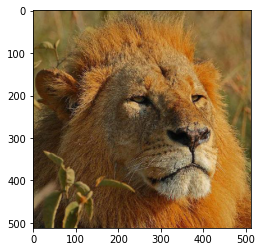

-----------------------------------------------------------------------
most similar products:


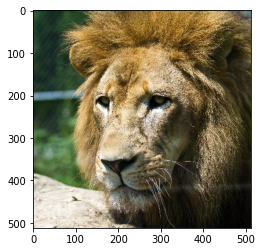

similarity score :  0.7914829


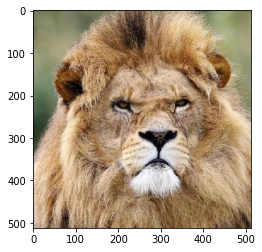

similarity score :  0.7744553


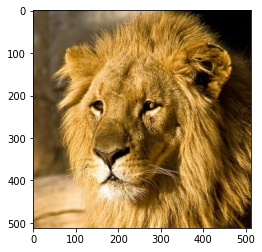

similarity score :  0.7682737


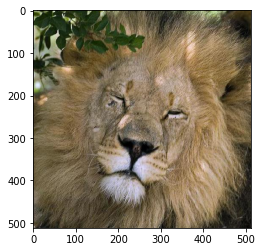

similarity score :  0.76152635


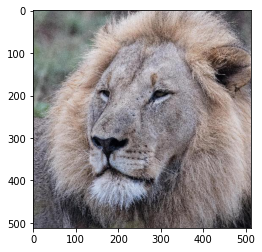

similarity score :  0.7572913


In [40]:
retrieve_most_similar_products(files[1])

-----------------------------------------------------------------------
original product:


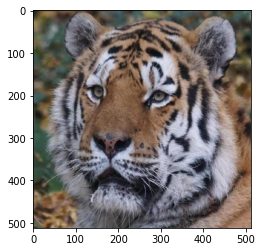

-----------------------------------------------------------------------
most similar products:


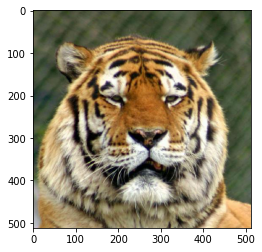

similarity score :  0.9195158


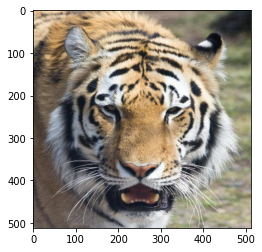

similarity score :  0.9173728


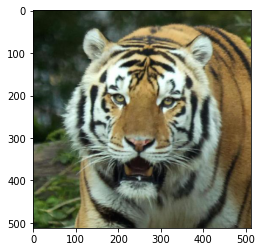

similarity score :  0.9111326


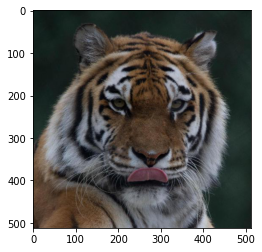

similarity score :  0.9110862


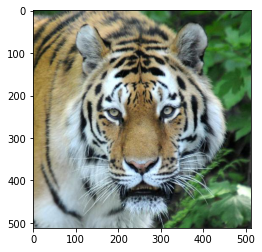

similarity score :  0.9104455


In [41]:
retrieve_most_similar_products(files[3])

-----------------------------------------------------------------------
original product:


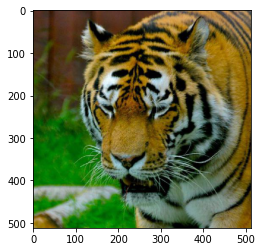

-----------------------------------------------------------------------
most similar products:


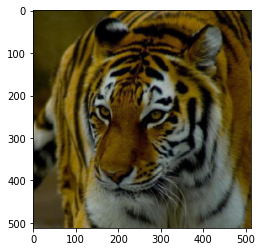

similarity score :  0.9033939


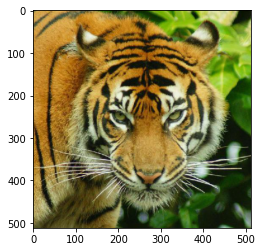

similarity score :  0.9020811


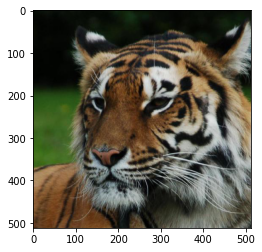

similarity score :  0.901848


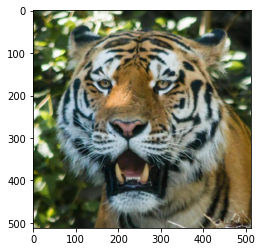

similarity score :  0.8993007


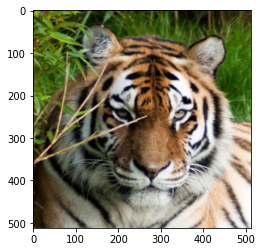

similarity score :  0.895149


In [43]:
retrieve_most_similar_products(files[10])